## PROJECT DESCRIPTION
* Spot checking different algorithms for data

In [20]:
import pandas as pd
from sklearn.model_selection import RepeatedKFold,cross_val_score,KFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from numpy import mean
from numpy import std
import numpy as np
from sklearn.pipeline import Pipeline
from itertools import compress
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
import seaborn as sns
from sklearn import tree
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1 - PROCESS THE INPUT DATA FILE AND READY FOR ML

In [2]:
# read the data
otu_data_file = pd.read_csv('/content/drive/MyDrive/UQ/Apoorva/Data_for_ML.csv',index_col=0)
display(otu_data_file.head(5))
print(otu_data_file.shape)

# pivot pandas 
otu_data_file_t = otu_data_file.T
# remove special character
otu_data_file_t.columns = otu_data_file_t.columns.str.replace(' ', '')
display(otu_data_file_t.head(5))
print(otu_data_file_t.shape)

,139536_S27,139537_S33,139538_S35,139539_COM,139540_COM,139541_S25,139542_COM,139543_S12,139544_COM,139545_S147,...,139581_S182,139582_S183,139583_S184,139584_S185,139585_S186,139586_S187,139587_S188,139588_S189,139589_S190,139590_S191
OTU1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
OTU5,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


(3247, 54)


,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,OTU10,...,OTU3238,OTU3239,OTU3240,OTU3241,OTU3242,OTU3243,Nitrate,Nitrate_classification,Phosphorus,Phosphorus_classification
139536_S27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.01,Normal,0.05,Moderately High(3x)
139537_S33,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,429,0,0.01,Normal,0.05,Moderately High(3x)
139538_S35,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0.01,Normal,0.05,Moderately High(3x)
139539_COM,0,0,0,0,0,0,0,0,2,8,...,0,4,0,0,303,0,0.2,High(10X),0.06,Moderately High(3x)
139540_COM,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,368,0,0.16,High(10X),0.13,High(5X)


(54, 3247)


label data shape (54,)
OTU data shape (54, 3243)


,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,OTU10,...,OTU3234,OTU3235,OTU3236,OTU3237,OTU3238,OTU3239,OTU3240,OTU3241,OTU3242,OTU3243
139536_S27,0,0,0,0,0,0,0,0,0,0,...,13,0,0,0,0,0,0,0,0,0
139537_S33,0,0,0,0,0,0,0,0,0,0,...,31,0,0,0,0,3,0,0,429,0
139538_S35,0,0,0,0,0,0,0,0,0,0,...,8,4,0,0,0,2,0,0,0,0
139539_COM,0,0,0,0,0,0,0,0,2,8,...,8,0,0,0,0,4,0,0,303,0
139540_COM,0,0,0,0,0,0,0,0,0,2,...,25,0,0,0,0,0,0,0,368,0


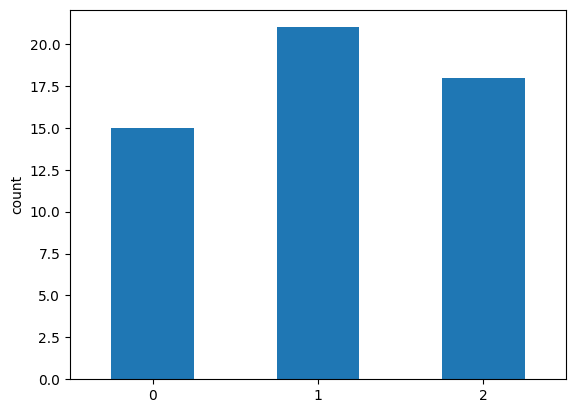

In [31]:
# Nitrate category assignment
otu_data_file_t['Nitrate'] = otu_data_file_t['Nitrate'].astype(float)
nitrate_conditions = [
    (otu_data_file_t['Nitrate'] <= 0.015),
    (otu_data_file_t['Nitrate'] > 0.015) & (otu_data_file_t['Nitrate'] < 0.3),
    (otu_data_file_t['Nitrate'] >= 0.3)
    ]

# create a list of the values we want to assign for each condition
nitrate_values = ['Normal', 'High', 'Severe']

# create a new column and use np.select to assign values to it using our lists as arguments
otu_data_file_t['Nitrate_classification_new'] = np.select(nitrate_conditions, nitrate_values)

# convert label to categorical value
labelencoder = LabelEncoder()
otu_data_file_t['Nitrate_classification_cat'] = labelencoder.fit_transform(otu_data_file_t['Nitrate_classification_new'])

# label 
label_data_nitrate  = otu_data_file_t['Nitrate_classification_cat']
print('label data shape',label_data_nitrate.shape)

# Remove labels
otu_data_file_t_filtered = otu_data_file_t.drop(columns=["Nitrate", "Nitrate_classification","Phosphorus","Phosphorus_classification","Nitrate_classification_cat","Nitrate_classification_new"],inplace=False)
print("OTU data shape",otu_data_file_t_filtered.shape)
display(otu_data_file_t_filtered.head(5))

# samples per label class
label_data_nitrate.value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()


label data shape (54,)
OTU data shape (54, 3245)


,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,OTU10,...,OTU3236,OTU3237,OTU3238,OTU3239,OTU3240,OTU3241,OTU3242,OTU3243,Nitrate_classification_new,Nitrate_classification_cat
139536_S27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Normal,1
139537_S33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,429,0,Normal,1
139538_S35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,Normal,1
139539_COM,0,0,0,0,0,0,0,0,2,8,...,0,0,0,4,0,0,303,0,High,0
139540_COM,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,368,0,High,0


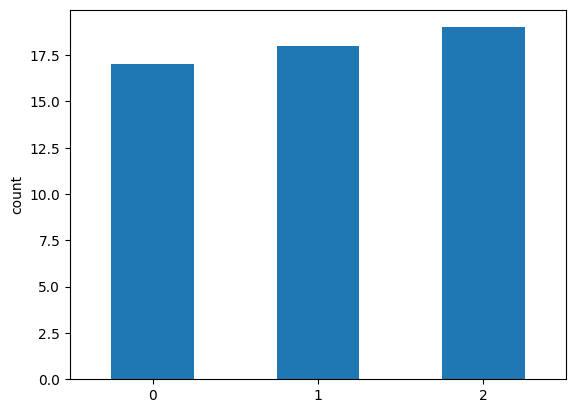

In [32]:
## LABEL ASSIGNMENT

# Phosphorous category assignment
otu_data_file_t['Phosphorus'] = otu_data_file_t['Phosphorus'].astype(float)
phosphorous_conditions = [
    (otu_data_file_t['Phosphorus'] >= 0.03) & (otu_data_file_t['Phosphorus'] < 0.1),
    (otu_data_file_t['Phosphorus'] >= 0.1) & (otu_data_file_t['Phosphorus'] < 0.15),
    (otu_data_file_t['Phosphorus'] >= 0.15) 
    ]

# create a list of the values we want to assign for each condition
phosphorous_values = ['High_3x', 'High_5x', 'Severe']

# create a new column and use np.select to assign values to it using our lists as arguments
otu_data_file_t['Phosphorus_classification_new'] = np.select(phosphorous_conditions, phosphorous_values)

# convert label to categorical value
labelencoder = LabelEncoder()
otu_data_file_t['Phosphorus_classification_cat'] = labelencoder.fit_transform(otu_data_file_t['Phosphorus_classification_new'])

# label 
label_data_phosphorous  = otu_data_file_t['Phosphorus_classification_cat']
print('label data shape',label_data_phosphorous.shape)

# Remove labels
otu_data_file_t_filtered = otu_data_file_t.drop(columns=["Nitrate", "Nitrate_classification","Phosphorus","Phosphorus_classification","Phosphorus_classification_cat","Phosphorus_classification_new"],inplace=False)
print("OTU data shape",otu_data_file_t_filtered.shape)
display(otu_data_file_t_filtered.head(5))

label_data_phosphorous.value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()

In [7]:
 # Filter columns by abundance criteria
otu_filter = 10
otu_data_file_t_filtered = otu_data_file_t_filtered.astype('int')
otu_data_file_t_filtered_abundance = otu_data_file_t_filtered[otu_data_file_t_filtered.columns[otu_data_file_t_filtered.sum() >= otu_filter]]
otu_data_file_t_filtered_abundance.shape

(54, 2020)

In [8]:
# Get correlations of each features in dataset and remove features correlated with each other
corrmat = otu_data_file_t_filtered_abundance.corr().abs()
upper_tri = corrmat.where(np.triu(np.ones(corrmat.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print("total features dropped due to correlation",len(to_drop))
print(corrmat[corrmat['OTU628'] > 0.90]['OTU628'])

otu_data_file_t_filtered_abundance = otu_data_file_t_filtered_abundance.drop(to_drop, axis=1)
print(otu_data_file_t_filtered_abundance.shape)

total features dropped due to correlation 444
OTU123     0.961636
OTU299     0.912141
OTU303     0.902772
OTU512     0.968339
OTU628     1.000000
OTU1464    0.988746
OTU1655    0.943415
OTU2162    0.902785
OTU2503    0.924169
OTU2867    0.925899
Name: OTU628, dtype: float64
(54, 1576)


### 2- SPOT DIFFERENT ALGORITHMS FOR THEIR PERFORMANCE

In [17]:
# CROSS VALIDATION to check k nearest neighbours, niave bayes, random forest, decision tree, xgboost
def define_models(models=dict()):
  
  # non-linear models
  n_neighbors = range(1, 21)
  for k in n_neighbors:
    models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
  models['cart'] = DecisionTreeClassifier()
  models['extra'] = ExtraTreeClassifier()
  models['bayes'] = GaussianNB()
  # ensemble models
  n_trees = 100
  models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
  models['bag'] = BaggingClassifier(n_estimators=n_trees)
  models['rf'] = RandomForestClassifier(n_estimators=n_trees)
  models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
  print('Defined %d models' % len(models))
  return models

In [40]:
# create a feature preparation pipeline for a model
def make_pipeline(model):
  steps = list()
  # standardization
  steps.append(('standardize', StandardScaler()))
  # normalization
  steps.append(('normalize', MinMaxScaler()))
  # remove fearures with no variance
  steps.append(('variance',VarianceThreshold()))
  # top 50 features only
  steps.append(('select50best',SelectKBest(f_classif,k=20)))
  # the model
  steps.append(('model', model))
  # create pipeline
  pipeline = Pipeline(steps=steps)
  return pipeline
 
# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
  # create the pipeline
  pipeline = make_pipeline(model)
  # evaluate model
  scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
  return scores
 
 
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
  results = dict()
  for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(X, y, model, folds, metric)
    # show process
    if scores is not None:
      # store a result
      results[name] = scores
      mean_score, std_score = mean(scores), std(scores)
      print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
    else:
      print('>%s: error' % name)
  return results
 
# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
  # check for no results
  if len(results) == 0:
    print('no results')
    return
  
  # determine how many results to summarize
  n = min(top_n, len(results))
  
  # create a list of (name, mean(scores)) tuples
  mean_scores = [(k,mean(v)) for k,v in results.items()]
  
  # sort tuples by mean score
  mean_scores = sorted(mean_scores, key=lambda x: x[1])
  # reverse for descending order (e.g. for accuracy)
  if maximize:
    mean_scores = list(reversed(mean_scores))
  
  # retrieve the top n for summarization
  names = [x[0] for x in mean_scores[:n]]
  scores = [results[x[0]] for x in mean_scores[:n]]
  
  # print the top n
  print()
  for i in range(n):
    name = names[i]
    mean_score, std_score = mean(results[name]), std(results[name])
    print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
  # boxplot for the top n
  pyplot.boxplot(scores, labels=names)
  _, labels = pyplot.xticks()
  pyplot.setp(labels, rotation=90)
  pyplot.savefig('spotcheck.png')

Defined 27 models


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>knn-1: 0.893 (+/-0.115)
>knn-2: 0.870 (+/-0.114)
>knn-3: 0.943 (+/-0.087)
>knn-4: 0.943 (+/-0.087)
>knn-5: 0.943 (+/-0.087)
>knn-6: 0.927 (+/-0.117)
>knn-7: 0.870 (+/-0.145)
>knn-8: 0.890 (+/-0.117)
>knn-9: 0.870 (+/-0.145)
>knn-10: 0.870 (+/-0.145)
>knn-11: 0.870 (+/-0.145)
>knn-12: 0.870 (+/-0.145)
>knn-13: 0.853 (+/-0.138)
>knn-14: 0.853 (+/-0.138)
>knn-15: 0.853 (+/-0.138)
>knn-16: 0.833 (+/-0.130)
>knn-17: 0.853 (+/-0.138)
>knn-18: 0.833 (+/-0.130)
>knn-19: 0.833 (+/-0.158)
>knn-20: 0.813 (+/-0.148)
>cart: 0.923 (+/-0.094)
>extra: 0.870 (+/-0.124)
>bayes: 0.920 (+/-0.133)
>ada: 0.903 (+/-0.097)
>bag: 0.943 (+/-0.087)
>rf: 0.960 (+/-0.080)
>et: 0.943 (+/-0.087)

Rank=1, Name=rf, Score=0.960 (+/- 0.080)
Rank=2, Name=et, Score=0.943 (+/- 0.087)
Rank=3, Name=bag, Score=0.943 (+/- 0.087)
Rank=4, Name=knn-5, Score=0.943 (+/- 0.087)
Rank=5, Name=knn-4, Score=0.943 (+/- 0.087)
Rank=6, Name=knn-3, Score=0.943 (+/- 0.087)
Rank=7, Name=knn-6, Score=0.927 (+/- 0.117)
Rank=8, Name=cart, Score

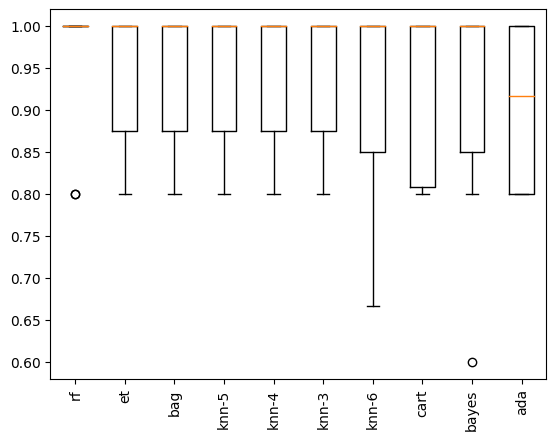

In [41]:
# NITRATE CHECK
# get model list
models = define_models()
# evaluate models
results = evaluate_models(otu_data_file_t_filtered_abundance, label_data_nitrate, models)
# summarize results
summarize_results(results)

Defined 27 models
>knn-1: 0.723 (+/-0.137)
>knn-2: 0.577 (+/-0.156)
>knn-3: 0.723 (+/-0.137)
>knn-4: 0.720 (+/-0.199)
>knn-5: 0.797 (+/-0.137)
>knn-6: 0.777 (+/-0.149)
>knn-7: 0.763 (+/-0.123)
>knn-8: 0.797 (+/-0.137)
>knn-9: 0.780 (+/-0.120)
>knn-10: 0.780 (+/-0.120)
>knn-11: 0.780 (+/-0.120)
>knn-12: 0.763 (+/-0.144)
>knn-13: 0.780 (+/-0.120)
>knn-14: 0.780 (+/-0.120)
>knn-15: 0.780 (+/-0.120)
>knn-16: 0.780 (+/-0.120)
>knn-17: 0.797 (+/-0.087)
>knn-18: 0.797 (+/-0.087)
>knn-19: 0.797 (+/-0.087)
>knn-20: 0.780 (+/-0.120)
>cart: 0.707 (+/-0.190)
>extra: 0.520 (+/-0.117)
>bayes: 0.760 (+/-0.159)
>ada: 0.497 (+/-0.215)
>bag: 0.757 (+/-0.158)
>rf: 0.793 (+/-0.145)
>et: 0.793 (+/-0.145)

Rank=1, Name=knn-19, Score=0.797 (+/- 0.087)
Rank=2, Name=knn-18, Score=0.797 (+/- 0.087)
Rank=3, Name=knn-17, Score=0.797 (+/- 0.087)
Rank=4, Name=knn-8, Score=0.797 (+/- 0.137)
Rank=5, Name=knn-5, Score=0.797 (+/- 0.137)
Rank=6, Name=et, Score=0.793 (+/- 0.145)
Rank=7, Name=rf, Score=0.793 (+/- 0.145)
R

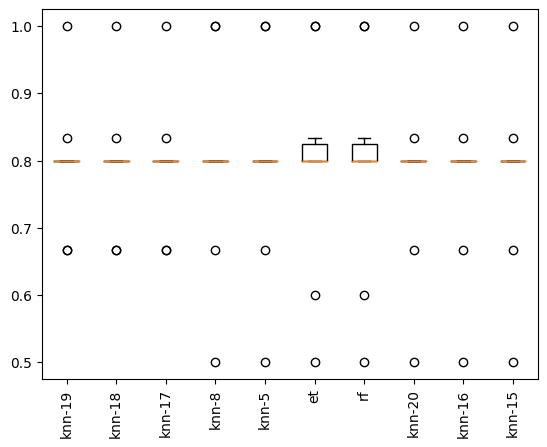

In [42]:
# PHOSPHOROUS CHECK
# get model list
models = define_models()
# evaluate models
results = evaluate_models(otu_data_file_t_filtered_abundance, label_data_phosphorous, models)
# summarize results
summarize_results(results)